# San Francisco Rental Prices Dashboard
____________________________________________

In [33]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [34]:
# Read the Mapbox API key

map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

In [47]:
def housing_units_per_year():
    housing_units_yearly = census.groupby('year')['housing_units'].mean().hvplot.bar(xlabel="Year", ylabel="Housing Units",ylim=(370000,385000), title="Housing Units Per Year")
    return housing_units_yearly

def average_gross_rent():
    average_rent = census.groupby('year')['gross_rent'].mean().hvplot.line(xlabel='Year', ylabel='Gross Rent', title='Average Gross Rent in SF')
    return average_rent

def average_sales_price():
    average_sales = census.groupby('year')['sale_price_sqr_foot'].mean().hvplot.line(xlabel='Year', ylabel='Average Sales Price', title='Average Sale Price Per Year')
    return average_sales    

def average_price_by_neighborhood():
    average_price = neighborhood_df.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood',title="Average Prices by Neighborhood.")
    return average_price

def top_most_expensive_neighborhoods():
    highest_priced_neighborhoods = top10_df_plot.head(10).plot(kind="bar",x="neighborhood",y="sale_price_sqr_foot",title="Top 10 Most Expensive Neighborhoods")
    return highest_priced_neighborhoods

def get_parallel_coordinates():
    parallel_coordinates = px.parallel_coordinates(top10_df_plot, color="sale_price_sqr_foot",title="Parallel Coordinates Plot")
    return parallel_coordinates

def get_parallel_categories():
    parallel_categories = px.parallel_categories(top10_df_plot,dimensions=["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"],
    color="sale_price_sqr_foot",title="Parallel Categories Plot.")
    return parallel_categories

def get_neighborhood_map():
    neighborhood_map = px.scatter_mapbox(joined_df,
                 lat="Lat",
                 lon="Lon",
                 size="sale_price_sqr_foot",
                 color="gross_rent",
                 title="Average Values Per Neighborhood In San Francisco")
    return neighborhood_map

# Panel Dashboard

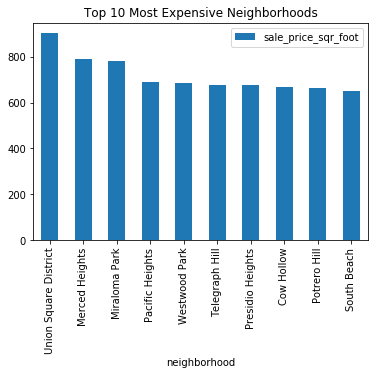

In [48]:
#Basic data column
housing_data = pn.Column(
    "##SF Housing Data", 
    housing_units_per_year(), 
    average_gross_rent(), 
    average_sales_price(),
)

#Neighborhood column
neigborhood_data = pn.Column(
    "##SF Neighborhood Data",
    average_price_by_neighborhood(), 
    top_most_expensive_neighborhoods(),
)

#Interactive column
interactive_data = pn.Column(
    "##SF Interactive Data",
    get_parallel_coordinates(),
    get_parallel_categories()
)

#Map column
map_data = pn.Column(
    "##SF Map",
    get_neighborhood_map(),
)

# Create tabs
dashboard = pn.Tabs(
    ("Housing Data", housing_data), ("Neighborhood Data", neigborhood_data), ("Interactive Data", interactive_data), ("SF Map", map_data)
)

In [49]:
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(Curve)
        [3] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)